In [1]:
import pickle
import pandas as pd
documents_f = open("list_dataframes.pickle","rb")
list_dataframes= pickle.load(documents_f)
documents_f.close()

In [2]:
combined=list_dataframes['address']
print(combined.dtypes)
for i,j in enumerate(list_dataframes):
    print(i,j,'shape',list_dataframes[j].shape)
    list_dataframes[j]['CID']=list_dataframes[j]['CID'].apply(lambda x: int(x))
    if i !=3:
        print(list_dataframes[j].dtypes)
        combined = combined.merge(list_dataframes[j],\
        on='CID', how="left")
print('combined dataframe','shape',combined.shape)

CID           int64
POST_CODE    object
dtype: object
(0, 'volunters_active', 'shape', (3633, 2))
CID         int64
TYPE_VOL    int64
dtype: object
(1, 'gifts', 'shape', (582111, 3))
CID           int64
AVG_gift    float64
NUM_gift      int64
dtype: object
(2, 'products_PK', 'shape', (14794, 4))
CID         int64
PRODUCT     int64
POST_C     object
NUM_P       int64
dtype: object
(3, 'address', 'shape', (742707, 2))
(4, 'members_active', 'shape', (35078, 2))
CID         int64
MEMB_STA    int64
dtype: object
(5, 'events', 'shape', (5124, 2))
CID       int64
NUM_EV    int64
dtype: object
('combined dataframe', 'shape', (742707, 10))


In [3]:
list_columns=list(combined.columns.values)
print(list_columns)

['CID', 'POST_CODE', 'TYPE_VOL', 'AVG_gift', 'NUM_gift', 'PRODUCT', 'POST_C', 'NUM_P', 'MEMB_STA', 'NUM_EV']


In [4]:
combined.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,POST_C,NUM_P,MEMB_STA,NUM_EV
0,0,URN-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,SK9 7SF,NaN,4.261538,13.0,NaN,NaN,NaN,NaN,NaN
2,100001,URN-100001,NaN,74.166667,3.0,NaN,NaN,NaN,NaN,NaN
3,100004,URN-100004,NaN,10.500000,1.0,NaN,NaN,NaN,NaN,NaN
4,100005,URN-100005,NaN,78.536667,3.0,NaN,NaN,NaN,NaN,NaN


In [5]:
for i,j in enumerate(list_columns):
    combined[j]=combined[j].fillna(0)

In [6]:
combined.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,POST_C,NUM_P,MEMB_STA,NUM_EV
0,0,URN-0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0
1,10,SK9 7SF,0.0,4.261538,13.0,0.0,0,0.0,0.0,0.0
2,100001,URN-100001,0.0,74.166667,3.0,0.0,0,0.0,0.0,0.0
3,100004,URN-100004,0.0,10.500000,1.0,0.0,0,0.0,0.0,0.0
4,100005,URN-100005,0.0,78.536667,3.0,0.0,0,0.0,0.0,0.0


In [7]:
combined.dtypes

CID            int64
POST_CODE     object
TYPE_VOL     float64
AVG_gift     float64
NUM_gift     float64
PRODUCT      float64
POST_C        object
NUM_P        float64
MEMB_STA     float64
NUM_EV       float64
dtype: object

In [8]:
a=combined[combined['POST_CODE']==0]
a.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,POST_C,NUM_P,MEMB_STA,NUM_EV


In [9]:
#def find_post_code(x):
#    if x[1]=='0' and x[6] !='0':
#        x[1]=x[6]
#    return x
#prova=combined.apply(find_post_code,axis=1)

In [10]:
del combined['POST_C']

In [11]:
combined.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,NUM_P,MEMB_STA,NUM_EV
0,0,URN-0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,10,SK9 7SF,0.0,4.261538,13.0,0.0,0.0,0.0,0.0
2,100001,URN-100001,0.0,74.166667,3.0,0.0,0.0,0.0,0.0
3,100004,URN-100004,0.0,10.500000,1.0,0.0,0.0,0.0,0.0
4,100005,URN-100005,0.0,78.536667,3.0,0.0,0.0,0.0,0.0


In [12]:
poste_code_to_region = pd.read_csv("postcodeccg.csv",sep=",")
poste_code_to_region.head()

,pcd,ccg,lat,long
0,AB1 0AA,S03000012,57.101474,-2.242851
1,AB1 0AB,S03000012,57.102554,-2.246308
2,AB1 0AD,S03000012,57.100556,-2.248342
3,AB1 0AE,S03000013,57.084444,-2.255708
4,AB1 0AF,S03000012,57.096656,-2.258102


In [13]:
#del poste_code_to_region['lat']
#del poste_code_to_region['long']
a=poste_code_to_region['pcd'].iloc[0:1]
a=str(a)
print(a,type(a))
def ff(x):
    try:
        x=str(x)
    except Exception:
        pass
    return x
combined['POST_CODE']=combined['POST_CODE'].apply(lambda x: ff(x))
poste_code_to_region['pcd']=poste_code_to_region['pcd'].apply(lambda x: ff(x))
poste_code_to_region=poste_code_to_region.rename(columns={'pcd': 'POST_CODE'})
#print(poste_code_to_region.shape)
print(poste_code_to_region.dtypes)
#poste_code_to_region.head()

('0    AB1 0AA\nName: pcd, dtype: object', <type 'str'>)
POST_CODE     object
ccg           object
lat          float64
long         float64
dtype: object


In [14]:
combined=combined.merge(poste_code_to_region, on='POST_CODE', how="left")

In [15]:
combined.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,NUM_P,MEMB_STA,NUM_EV,ccg,lat,long
0,0,URN-0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,10,SK9 7SF,0.0,4.261538,13.0,0.0,0.0,0.0,0.0,E38000056,53.309307,-2.262493
2,100001,URN-100001,0.0,74.166667,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100004,URN-100004,0.0,10.500000,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,100005,URN-100005,0.0,78.536667,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [16]:
combined["ccg"].fillna(0,inplace=True)
combined["lat"].fillna(0,inplace=True)
combined["long"].fillna(0,inplace=True)

In [17]:
combined.head()

,CID,POST_CODE,TYPE_VOL,AVG_gift,NUM_gift,PRODUCT,NUM_P,MEMB_STA,NUM_EV,ccg,lat,long
0,0,URN-0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000
1,10,SK9 7SF,0.0,4.261538,13.0,0.0,0.0,0.0,0.0,E38000056,53.309307,-2.262493
2,100001,URN-100001,0.0,74.166667,3.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000
3,100004,URN-100004,0.0,10.500000,1.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000
4,100005,URN-100005,0.0,78.536667,3.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000


In [18]:
list_unique=combined["ccg"].unique()
print(len(list_unique))

255


In [19]:
list_aus=[]
for i,j in enumerate(list_unique):
    list_aus.append((j,i))
dict_aus = {key: value for (key, value) in list_aus}

In [20]:
#combined['ccg']=combined['ccg'].apply(lambda x: dict_aus[x])

In [21]:
combined.dtypes

CID            int64
POST_CODE     object
TYPE_VOL     float64
AVG_gift     float64
NUM_gift     float64
PRODUCT      float64
NUM_P        float64
MEMB_STA     float64
NUM_EV       float64
ccg           object
lat          float64
long         float64
dtype: object

In [22]:
combined['TYPE_VOL']=combined['TYPE_VOL'].apply(lambda x: int(x))
combined['NUM_gift']=combined['NUM_gift'].apply(lambda x: int(x))
combined['PRODUCT']=combined['PRODUCT'].apply(lambda x: int(x))
combined['NUM_P']=combined['NUM_P'].apply(lambda x: int(x))
combined['MEMB_STA']=combined['MEMB_STA'].apply(lambda x: int(x))
combined['NUM_EV']=combined['NUM_EV'].apply(lambda x: int(x))

In [23]:
combined.dtypes

CID            int64
POST_CODE     object
TYPE_VOL       int64
AVG_gift     float64
NUM_gift       int64
PRODUCT        int64
NUM_P          int64
MEMB_STA       int64
NUM_EV         int64
ccg           object
lat          float64
long         float64
dtype: object

In [24]:
df_aus=combined#[combined['PRODUCT'] !=0]
print(df_aus.shape)
import create_hist_mod as ch
#prova= combined.groupby('ccg')['PRODUCT'].transform(pd.Series.value_counts)
series_aus=ch.count_unique_n1\
(df_aus,n1='ccg')
print(series_aus.shape)
#print(type(prova))
num_active_vol=pd.DataFrame(dict(num_active_vol =series_aus)).reset_index()
num_active_vol.head(5)

(742707, 12)
(254L,)


,ccg,num_active_vol
0,E38000001,26
1,E38000002,49
2,E38000003,332
3,E38000004,510
4,E38000005,3306


In [38]:
aaa=ch.mean_n2_on_unique_n1\
(combined,n1='ccg',n2='NUM_gift')  
#import numpy as np
#aaa=population.pivot_table(index="ccg", values="TYPE_VOL",aggfunc='count')
aaa.head()

ccg
E38000001      165.0
E38000002      241.0
E38000003     1022.0
E38000004     1884.0
E38000005    15220.0
Name: NUM_gift, dtype: float64

In [26]:
population=pd.read_csv('PDpop_ccg.csv',sep=";")

In [27]:

del population['Unnamed: 12']
del population['Unnamed: 13']
population.head()

,CCG,CCGNameClean,CCGNamePK,TotPDEst,Age029,Age3039,Age4049,Age5059,Age6069,Age7079,Age80plus,TotPop
0,E38000001,"NHS Airedale, Wharfedale and Craven","NHS Airedale, Wharfedale and Craven",364.0,0.0,2.0,3.0,21.0,69.0,137.0,132.0,160613.0
1,E38000002,NHS Ashford,NHS Ashford,283.0,0.0,1.0,2.0,16.0,54.0,107.0,103.0,124045.0
2,E38000003,NHS Aylesbury Vale,NHS Aylesbury Vale,466.0,0.0,3.0,4.0,27.0,88.0,175.0,169.0,202445.0
3,E38000004,NHS Barking and Dagenham,NHS Barking & Dagenham,455.0,0.0,3.0,4.0,26.0,86.0,171.0,165.0,202358.0
4,E38000005,NHS Barnet,NHS Barnet,860.0,0.0,5.0,8.0,48.0,163.0,324.0,312.0,381776.0


In [28]:
population.shape

(238, 12)

In [29]:
population=population.rename(columns={'CCG': 'ccg'})
population.dtypes

ccg              object
CCGNameClean     object
CCGNamePK        object
TotPDEst        float64
Age029          float64
Age3039         float64
Age4049         float64
Age5059         float64
Age6069         float64
Age7079         float64
Age80plus       float64
TotPop          float64
dtype: object

In [30]:
population = population.merge(num_active_vol,\
        on='ccg', how="left")

In [31]:
population['num_active_vol']=population['num_active_vol'].fillna(0)

In [32]:
population.head()

,ccg,CCGNameClean,CCGNamePK,TotPDEst,Age029,Age3039,Age4049,Age5059,Age6069,Age7079,Age80plus,TotPop,num_active_vol
0,E38000001,"NHS Airedale, Wharfedale and Craven","NHS Airedale, Wharfedale and Craven",364.0,0.0,2.0,3.0,21.0,69.0,137.0,132.0,160613.0,26.0
1,E38000002,NHS Ashford,NHS Ashford,283.0,0.0,1.0,2.0,16.0,54.0,107.0,103.0,124045.0,49.0
2,E38000003,NHS Aylesbury Vale,NHS Aylesbury Vale,466.0,0.0,3.0,4.0,27.0,88.0,175.0,169.0,202445.0,332.0
3,E38000004,NHS Barking and Dagenham,NHS Barking & Dagenham,455.0,0.0,3.0,4.0,26.0,86.0,171.0,165.0,202358.0,510.0
4,E38000005,NHS Barnet,NHS Barnet,860.0,0.0,5.0,8.0,48.0,163.0,324.0,312.0,381776.0,3306.0


In [33]:
population.dtypes

ccg                object
CCGNameClean       object
CCGNamePK          object
TotPDEst          float64
Age029            float64
Age3039           float64
Age4049           float64
Age5059           float64
Age6069           float64
Age7079           float64
Age80plus         float64
TotPop            float64
num_active_vol    float64
dtype: object

In [34]:
n_null = pd.isnull(population["TotPDEst"])
n_null_true=n_null[n_null==True]
null_count = len(n_null_true)
print(null_count)
population = population.dropna(subset=["TotPDEst"])

3


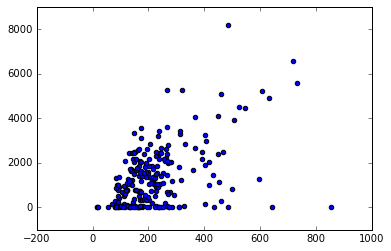

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(population['Age80plus'],population['num_active_vol'])

In [36]:
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(population['Age80plus'],population['num_active_vol'])
print('correlation_coefficent', r)

('correlation_coefficent', 0.47600478309039101)


In [37]:
population['num_active_vol'].head(50)

0       26.0
1       49.0
2      332.0
3      510.0
4     3306.0
5     1573.0
6      196.0
7      427.0
8     2500.0
9     1669.0
10    1515.0
11    5213.0
12    1411.0
13     785.0
14     913.0
15    2309.0
16     501.0
17     155.0
18     694.0
19    1451.0
20    3213.0
21    4050.0
22    5254.0
23    1673.0
24    2067.0
25    6575.0
26    2613.0
27     156.0
28    2053.0
29    2164.0
30    1615.0
31     797.0
32    3605.0
33    1251.0
34     509.0
35     153.0
36       3.0
37    2653.0
38       8.0
39    3438.0
40    2018.0
41     994.0
42    1839.0
43    1527.0
44    4904.0
45    2617.0
46     724.0
47    1170.0
48    5100.0
49    1828.0
Name: num_active_vol, dtype: float64